In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

essays = pd.read_csv('../data/processed/essays_model_2.csv', index_col=0)

# Set the essay id as the index of the dataframe
essays.set_index('essay_id', inplace=True)

essays.head()

# binary classification

,domain1_score,misspelt,correct,length,lexical_diversity,n_sentences,nouns,verbs,adverbs,adjectives,n_top500
essay_id,,,,,,,,,,,
14834,2.0,6,116,123,1.37,9,29,22,9,9,0
14835,3.0,11,169,180,1.55,9,43,35,15,13,0
14836,4.0,4,162,169,1.62,8,41,35,12,9,0
14837,1.0,18,175,199,1.69,11,36,38,8,4,0
14838,3.0,4,158,162,1.74,11,38,34,10,13,0


In [23]:
essays.domain1_score.unique()

array([2., 3., 4., 1., 0.])

In [24]:
def binaryClassification(v):
    if v < 3.0:
        v = 0.0
    elif v >= 3.0:
        v = 1.0
    return v

essays['domain1_score'] = essays['domain1_score'].map(binaryClassification)

In [26]:
essays.domain1_score.unique()

array([0., 1.])

In [27]:
X = essays.drop(['domain1_score'], axis=1)
y = essays['domain1_score']

In [28]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [29]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)
accuracy_entropy

0.8111111111111111

In [30]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_pred, y_test)
accuracy_gini

0.8166666666666667

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Compute the array containing the 10-folds CV MSEs
Accuracy_CV_scores = cross_val_score(dt_entropy, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1) 

Accuracy_CV_scores

array([0.81314879, 0.79930796, 0.83333333, 0.80836237, 0.81184669])

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED=3

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=5)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=SEED)


# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

In [34]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.825
K Nearest Neighbours : 0.817
Classification Tree : 0.822


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [35]:
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.828


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=12)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.86


In [37]:
# split data set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Instantiate dt
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=0.016, random_state=4)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1, random_state=13)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_pred, y_test)

# Extract the OOB accuracy from bc
oob_accuracy = bc.oob_score_

print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

print('OOB accuracy of bc: {:.2f}'.format(oob_accuracy))

Test set accuracy of bc: 0.84
OOB accuracy of bc: 0.82


In [38]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate rf
rf = RandomForestClassifier(criterion='gini', random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [39]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [40]:
from sklearn.model_selection import RandomizedSearchCV

# criterion for information gain
criterion = ['gini', 'entropy']

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'criterion': criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'criterion': ['gini', 'entropy'],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [41]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'criterion': ['gini', 'entropy'], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, ve

In [42]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': True}

#### Base Model

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate rf
rf = RandomForestClassifier(criterion='entropy', random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[ 82  30]
 [ 34 214]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72       112
         1.0       0.88      0.86      0.87       248

   micro avg       0.82      0.82      0.82       360
   macro avg       0.79      0.80      0.79       360
weighted avg       0.82      0.82      0.82       360





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Random Search Model

In [44]:
# Instantiate rf with best params from Random Search
rf_random = RandomForestClassifier(criterion='entropy', 
                            n_estimators=800, 
                            min_samples_leaf=4, 
                            min_samples_split=5, 
                            max_features='sqrt',
                            max_depth=None,
                            bootstrap=True,
                            random_state=2)

# Fit rf to the training set    
rf_random.fit(X_train, y_train)

# predict
y_pred = rf_random.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')

=== Confusion Matrix ===
[[ 75  37]
 [ 22 226]]


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72       112
         1.0       0.86      0.91      0.88       248

   micro avg       0.84      0.84      0.84       360
   macro avg       0.82      0.79      0.80       360
weighted avg       0.83      0.84      0.83       360





In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8361111111111111


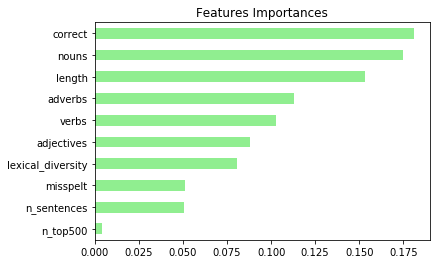

In [46]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf_random.feature_importances_, index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()